<a href="https://colab.research.google.com/github/KurovDenis/ASI-Arch/blob/main/%D0%A2%D0%95%D0%A1%D0%A2_%D0%9A_%D0%92%D0%AB%D0%A0%D0%90%D0%91%D0%9E%D0%A2%D0%9A%D0%984_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# ЯЧЕЙКА 0: НАСТРОЙКИ РАБОЧЕГО РАСПИСАНИЯ ЦЕХА
print("="*80)
print("ЯЧЕЙКА 0: НАСТРОЙКИ РАБОЧЕГО РАСПИСАНИЯ ЦЕХА")
print("="*80)

# === НАСТРОЙКИ ГРАФИКА ЦЕХА ===
WORK_SCHEDULE = {
    'Цех': 'Цех1',
    'Первая смена (начало)': 7,   # Начало дневной смены (час, 0-23)
    'Первая смена (окончание)': 19, # Окончание дневной смены (час)
    'Вторая смена (начало)': 19,   # Начало вечерней смены (час)
    'Вторая смена (окончание)': 3, # Окончание вечерней смены (час, может быть < начала → значит следующий день)
    'Общий фонд': '20 часов в сутки',
    'Рабочие сутки': '07:00 текущего дня до 03:00 следующего дня',
    'Нерабочий период (начало)': 3, # Начало нерабочего периода
    'Нерабочий период (окончание)': 7, # Окончание нерабочего периода
}

print("НАСТРОЙКИ РАСПИСАНИЯ ЦЕХА 1:")
for key, value in WORK_SCHEDULE.items():
    print(f"  {key}: {value}")

ЯЧЕЙКА 0: НАСТРОЙКИ РАБОЧЕГО РАСПИСАНИЯ ЦЕХА
НАСТРОЙКИ РАСПИСАНИЯ ЦЕХА 1:
  Цех: Цех1
  Первая смена (начало): 7
  Первая смена (окончание): 19
  Вторая смена (начало): 19
  Вторая смена (окончание): 3
  Общий фонд: 20 часов в сутки
  Рабочие сутки: 07:00 текущего дня до 03:00 следующего дня
  Нерабочий период (начало): 3
  Нерабочий период (окончание): 7


In [51]:
# ЯЧЕЙКА 1: ВХОДНЫЕ ДАННЫЕ И ПАРАМЕТРЫ (ИСПРАВЛЕННАЯ)
print("="*80)
print("ЯЧЕЙКА 1: ВХОДНЫЕ ДАННЫЕ И ПАРАМЕТРЫ (ИСПРАВЛЕННАЯ)")
print("="*80)

import pandas as pd
from datetime import datetime

# Пример изделия и партии
PRODUCT_INFO = {
    'Изделие': 'вагон_тест_001',
    'Количество в партии': 2,
    'Дата выпуска': '15.09.2025'
}

print(f"\nИЗДЕЛИЕ: {PRODUCT_INFO['Изделие']}")
print(f"КОЛИЧЕСТВО В ПАРТИИ: {PRODUCT_INFO['Количество в партии']} шт")
print(f"ДАТА ВЫПУСКА: {PRODUCT_INFO['Дата выпуска']}")

# Определение партий
BATCHES = {
    'Batch_001': {
        'Items': ['вагон_тест_001'],
        'Quantity': 2
    },
    'Batch_002': {
        'Items': ['котел_тест_001'],
        'Quantity': PRODUCT_INFO['Количество в партии']  # 2 котла для 2 вагонов
    }
}

print(f"\nИНФОРМАЦИЯ О ПАРТИЯХ:")
for batch_id, batch_info in BATCHES.items():
    print(f"  {batch_id}: {batch_info['Items']} (кол-во: {batch_info['Quantity']})")


# Структура изделия - словарь компонентов
PRODUCT_STRUCTURE = {
    'вагон_тест_001': {
        'котел_тест_001': PRODUCT_INFO['Количество в партии']
    }
}

print(f"\nСТРУКТУРА ИЗДЕЛИЯ:")
print(f"  {PRODUCT_INFO['Изделие']} → котел_тест_001 ({PRODUCT_STRUCTURE['вагон_тест_001']['котел_тест_001']} шт)")

# Операции изделия (вагона) - словарь по изделиям
OPERATIONS_VAGON = [
    {
        'Операция': '[005] Дробеструйная',
        'Тип времени': 'НаДеталь',
        'Тшт (мин)': 10,
        'Тпз (мин)': 5,
        'Время обслуживания (мин)': 15,
        'Количество': 2,
        'Исполнители': [
            {'Профессия': 'Слесарь', 'Разряд': 5, 'Время рабочего': 20}
        ],
        'Дата операции': datetime(2025, 9, 15)
    },
    {
        'Операция': '[010] Покраска',
        'Тип времени': 'НаДеталь',
        'Тшт (мин)': 20,
        'Тпз (мин)': 10,
        'Время обслуживания (мин)': 5,
        'Количество': 2,
        'Исполнители': [
            {'Профессия': 'Сварщик', 'Разряд': 6, 'Время рабочего': 40}
        ],
        'Дата операции': datetime(2025, 9, 15)
    }
]

# Операции котла
OPERATIONS_KOTEL = [
    {
        'Операция': '[001] Подготовка заготовки',
        'Тип времени': 'НаДеталь',
        'Тшт (мин)': 15,
        'Тпз (мин)': 10,
        'Время обслуживания (мин)': 5,
        'Количество': PRODUCT_STRUCTURE['вагон_тест_001']['котел_тест_001'],
        'Исполнители': [
            {'Профессия': 'Слесарь', 'Разряд': 4, 'Время рабочего': 25}
        ],
        'Дата операции': datetime(2025, 9, 14)
    },
    {
        'Операция': '[002] Сварка основания',
        'Тип времени': 'НаДеталь',
        'Тшт (мин)': 30,
        'Тпз (мин)': 15,
        'Время обслуживания (мин)': 10,
        'Количество': PRODUCT_STRUCTURE['вагон_тест_001']['котел_тест_001'],
        'Исполнители': [
            {'Профессия': 'Сварщик', 'Разряд': 6, 'Время рабочего': 55}
        ],
        'Дата операции': datetime(2025, 9, 14)
    }
]

# Словарь операций по изделиям для автоматического раскрытия
OPERATIONS_BY_PRODUCT = {
    'вагон_тест_001': OPERATIONS_VAGON,
    'котел_тест_001': OPERATIONS_KOTEL
}

# Вывод информации по операциям вагона
df_operations_vagon = pd.DataFrame([
    {
        'Операция': op['Операция'],
        'Тип времени': op['Тип времени'],
        'Тшт (мин)': op['Тшт (мин)'],
        'Тпз (мин)': op['Тпз (мин)'],
        'Время обсл. (мин)': op['Время обслуживания (мин)'],
        'Кол-во': op['Количество']
    } for op in OPERATIONS_VAGON
])

print("\nОПЕРАЦИИ ВАГОНА:")
print(df_operations_vagon.to_string(index=False))

# Вывод информации по операциям котла
df_operations_kotel = pd.DataFrame([
    {
        'Операция': op['Операция'],
        'Тип времени': op['Тип времени'],
        'Тшт (мин)': op['Тшт (мин)'],
        'Тпз (мин)': op['Тпз (мин)'],
        'Время обсл. (мин)': op['Время обслуживания (мин)'],
        'Кол-во': op['Количество']
    } for op in OPERATIONS_KOTEL
])

print("\nОПЕРАЦИИ КОТЛА:")
print(df_operations_kotel.to_string(index=False))

ЯЧЕЙКА 1: ВХОДНЫЕ ДАННЫЕ И ПАРАМЕТРЫ (ИСПРАВЛЕННАЯ)

ИЗДЕЛИЕ: вагон_тест_001
КОЛИЧЕСТВО В ПАРТИИ: 2 шт
ДАТА ВЫПУСКА: 15.09.2025

ИНФОРМАЦИЯ О ПАРТИЯХ:
  Batch_001: ['вагон_тест_001'] (кол-во: 2)
  Batch_002: ['котел_тест_001'] (кол-во: 2)

СТРУКТУРА ИЗДЕЛИЯ:
  вагон_тест_001 → котел_тест_001 (2 шт)

ОПЕРАЦИИ ВАГОНА:
           Операция Тип времени  Тшт (мин)  Тпз (мин)  Время обсл. (мин)  Кол-во
[005] Дробеструйная    НаДеталь         10          5                 15       2
     [010] Покраска    НаДеталь         20         10                  5       2

ОПЕРАЦИИ КОТЛА:
                  Операция Тип времени  Тшт (мин)  Тпз (мин)  Время обсл. (мин)  Кол-во
[001] Подготовка заготовки    НаДеталь         15         10                  5       2
    [002] Сварка основания    НаДеталь         30         15                 10       2


In [52]:
# ЯЧЕЙКА 2: РАСПИСАНИЕ ЦЕХА И РАБОЧИЙ ДЕНЬ
print("="*80)
print("ЯЧЕЙКА 2: РАСПИСАНИЕ ЦЕХА И РАБОЧИЙ ДЕНЬ")
print("="*80)

from datetime import datetime, timedelta
import pandas as pd
import calendar

def build_work_schedule_table(product_info, work_schedule):
    """Построение таблицы рабочего расписания на текущий и предыдущий месяц"""

    # Получаем дату выпуска
    try:
        release_date = datetime.strptime(product_info['Дата выпуска'], '%d.%m.%Y')
    except ValueError:
        release_date = datetime(2025, 9, 15)

    current_month = release_date.replace(day=1)
    if current_month.month == 1:
        previous_month = current_month.replace(year=current_month.year - 1, month=12)
    else:
        previous_month = current_month.replace(month=current_month.month - 1)

    print(f"ПОСТРОЕНИЕ РАСПИСАНИЯ ДЛЯ:")
    print(f"  Текущий месяц: {current_month.strftime('%m.%Y')} ({calendar.month_name[current_month.month]} {current_month.year})")
    print(f"  Предыдущий месяц: {previous_month.strftime('%m.%Y')} ({calendar.month_name[previous_month.month]} {previous_month.year})")

    # Функция для проверки рабочего времени
    def is_working_time(check_time, work_schedule):
        """Проверка, является ли время рабочим с учетом настроек цеха"""
        hour = check_time.hour
        night_end = work_schedule['Вторая смена (окончание)']
        day_start = work_schedule['Первая смена (начало)']
        non_work_start = work_schedule['Нерабочий период (начало)']
        non_work_end = work_schedule['Нерабочий период (окончание)']

        # Если время в рабочем периоде 1-й или 2-й смены
        if hour >= day_start or hour < night_end:
            # Но если попадает в нерабочий период
            if non_work_start < non_work_end:
                # Нерабочий период в пределах одного дня
                if hour >= non_work_start and hour < non_work_end:
                    return False
            else:
                # Нерабочий период пересекает полночь
                if hour >= non_work_start or hour < non_work_end:
                    return False
            return True
        return False

    # Функция для получения типа дня
    def get_day_type(date, work_schedule):
        """Определение типа дня: Рабочий/Выходной"""
        # Проверяем несколько часов в день для определения типа
        working_hours = 0
        total_hours = 0

        for hour in range(24):
            check_time = date.replace(hour=hour, minute=0, second=0)
            total_hours += 1
            if is_working_time(check_time, work_schedule):
                working_hours += 1

        if working_hours > 0:
            return "Рабочий"
        else:
            return "Выходной"

    # Функция для генерации расписания на месяц
    def generate_month_schedule(year, month, work_schedule):
        """Генерация расписания на конкретный месяц"""
        days_in_month = calendar.monthrange(year, month)[1]
        schedule_data = []

        for day in range(1, days_in_month + 1):
            date = datetime(year, month, day)

            # Определяем рабочие часы в этот день
            working_hours = []
            non_working_hours = []

            for hour in range(24):
                check_time = date.replace(hour=hour, minute=0, second=0)
                if is_working_time(check_time, work_schedule):
                    working_hours.append(hour)
                else:
                    non_working_hours.append(hour)

            day_type = get_day_type(date, work_schedule)

            # Определяем смены
            first_shift_start = work_schedule['Первая смена (начало)']
            first_shift_end = work_schedule['Первая смена (окончание)']
            second_shift_start = work_schedule['Вторая смена (начало)']
            second_shift_end = work_schedule['Вторая смена (окончание)']

            first_shift = f"{first_shift_start:02d}:00-{first_shift_end:02d}:00"
            if second_shift_end < second_shift_start:
                second_shift = f"{second_shift_start:02d}:00-24:00 и 00:00-{second_shift_end:02d}:00"
            else:
                second_shift = f"{second_shift_start:02d}:00-{second_shift_end:02d}:00"

            schedule_data.append({
                'Дата': date.strftime('%d.%m.%Y'),
                'День недели': calendar.day_name[date.weekday()],
                'Тип дня': day_type,
                'Рабочие часы': len(working_hours),
                '1 смена': first_shift,
                '2 смена': second_shift,
                'Нерабочий период': f"{work_schedule['Нерабочий период (начало)']:02d}:00-{work_schedule['Нерабочий период (окончание)']:02d}:00"
            })

        return schedule_data

    # Генерируем расписание для обоих месяцев
    print(f"\nРАСПИСАНИЕ НА {calendar.month_name[previous_month.month].upper()} {previous_month.year}:")
    print("-" * 100)
    prev_month_schedule = generate_month_schedule(previous_month.year, previous_month.month, work_schedule)
    df_prev = pd.DataFrame(prev_month_schedule)
    print(df_prev.to_string(index=False))

    print(f"\nРАСПИСАНИЕ НА {calendar.month_name[current_month.month].upper()} {current_month.year}:")
    print("-" * 100)
    current_month_schedule = generate_month_schedule(current_month.year, current_month.month, work_schedule)
    df_current = pd.DataFrame(current_month_schedule)
    print(df_current.to_string(index=False))

    # Сводная статистика
    total_days_prev = len(prev_month_schedule)
    working_days_prev = len([d for d in prev_month_schedule if d['Тип дня'] == 'Рабочий'])
    total_working_hours_prev = sum([d['Рабочие часы'] for d in prev_month_schedule])

    total_days_current = len(current_month_schedule)
    working_days_current = len([d for d in current_month_schedule if d['Тип дня'] == 'Рабочий'])
    total_working_hours_current = sum([d['Рабочие часы'] for d in current_month_schedule])

    print(f"\nСВОДНАЯ СТАТИСТИКА:")
    print("=" * 50)
    print(f"{calendar.month_name[previous_month.month]} {previous_month.year}:")
    print(f"  Всего дней: {total_days_prev}")
    print(f"  Рабочих дней: {working_days_prev}")
    print(f"  Всего рабочих часов: {total_working_hours_prev}")
    print(f"  Среднее рабочих часов в день: {total_working_hours_prev/total_days_prev:.1f}")

    print(f"\n{calendar.month_name[current_month.month]} {current_month.year}:")
    print(f"  Всего дней: {total_days_current}")
    print(f"  Рабочих дней: {working_days_current}")
    print(f"  Всего рабочих часов: {total_working_hours_current}")
    print(f"  Среднее рабочих часов в день: {total_working_hours_current/total_days_current:.1f}")

    return df_prev, df_current

# Вызов функции построения расписания
df_prev, df_current = build_work_schedule_table(PRODUCT_INFO, WORK_SCHEDULE)

ЯЧЕЙКА 2: РАСПИСАНИЕ ЦЕХА И РАБОЧИЙ ДЕНЬ
ПОСТРОЕНИЕ РАСПИСАНИЯ ДЛЯ:
  Текущий месяц: 09.2025 (September 2025)
  Предыдущий месяц: 08.2025 (August 2025)

РАСПИСАНИЕ НА AUGUST 2025:
----------------------------------------------------------------------------------------------------
      Дата День недели Тип дня  Рабочие часы     1 смена                   2 смена Нерабочий период
01.08.2025      Friday Рабочий            20 07:00-19:00 19:00-24:00 и 00:00-03:00      03:00-07:00
02.08.2025    Saturday Рабочий            20 07:00-19:00 19:00-24:00 и 00:00-03:00      03:00-07:00
03.08.2025      Sunday Рабочий            20 07:00-19:00 19:00-24:00 и 00:00-03:00      03:00-07:00
04.08.2025      Monday Рабочий            20 07:00-19:00 19:00-24:00 и 00:00-03:00      03:00-07:00
05.08.2025     Tuesday Рабочий            20 07:00-19:00 19:00-24:00 и 00:00-03:00      03:00-07:00
06.08.2025   Wednesday Рабочий            20 07:00-19:00 19:00-24:00 и 00:00-03:00      03:00-07:00
07.08.2025    Thurs

In [53]:
# ЯЧЕЙКА 3: ХРОНИКА ВЫРАБОТКИ ПО ПРОФЕССИИ
print("="*80)
print("ЯЧЕЙКА 2: ХРОНИКА ВЫРАБОТКИ ПО ПРОФЕССИИ")
print("="*80)

# Таблица хроники выработки (август 2025)
CHRONICA_AUGUST = [
    {'Профессия': 'Слесарь', 'Разряд': 5, 'Цех': 'Цех1', 'Процент': 110, 'Коэффициент': 1.10, 'Статус': 'Утверждено'},
    {'Профессия': 'Сварщик', 'Разряд': 6, 'Цех': 'Цех1', 'Процент': 130, 'Коэффициент': 1.30, 'Статус': 'Утверждено'},
    {'Профессия': 'Клепальщик', 'Разряд': 6, 'Цех': 'Цех1', 'Процент': 105, 'Коэффициент': 1.05, 'Статус': 'Утверждено'},
]

df_chronica_aug = pd.DataFrame(CHRONICA_AUGUST)
print(f"\nТАБЛИЦА ХРОНИКИ ВЫРАБОТКИ - АВГУСТ 2025")
print("-"*60)
print(df_chronica_aug.to_string(index=False))

# Таблица хроники выработки (сентябрь 2025)
CHRONICA_SEPTEMBER = [
    {'Профессия': 'Слесарь', 'Разряд': 5, 'Цех': 'Цех1', 'Процент': 115, 'Коэффициент': 1.15, 'Статус': 'Утверждено'},
    {'Профессия': 'Сварщик', 'Разряд': 6, 'Цех': 'Цех1', 'Процент': 125, 'Коэффициент': 1.25, 'Статус': 'Утверждено'},
]

df_chronica_sep = pd.DataFrame(CHRONICA_SEPTEMBER)
print(f"\nТАБЛИЦА ХРОНИКИ ВЫРАБОТКИ - СЕНТЯБРЬ 2025")
print("-"*60)
print(df_chronica_sep.to_string(index=False))

print(f"\nПРАВИЛА ПОИСКА КОЭФФИЦИЕНТА ВЫРАБОТКИ:")
print("1. Ищем по точному соответствию: Профессия, Разряд, Цех")
print("2. Используем только записи со статусом 'Утверждено'")
print("3. Если есть данные в текущем месяце - используем их")
print("4. Если нет - ищем в предыдущих месяцах")
print("5. Если нигде не найдено - используем K = 1.00")

ЯЧЕЙКА 2: ХРОНИКА ВЫРАБОТКИ ПО ПРОФЕССИИ

ТАБЛИЦА ХРОНИКИ ВЫРАБОТКИ - АВГУСТ 2025
------------------------------------------------------------
 Профессия  Разряд  Цех  Процент  Коэффициент     Статус
   Слесарь       5 Цех1      110         1.10 Утверждено
   Сварщик       6 Цех1      130         1.30 Утверждено
Клепальщик       6 Цех1      105         1.05 Утверждено

ТАБЛИЦА ХРОНИКИ ВЫРАБОТКИ - СЕНТЯБРЬ 2025
------------------------------------------------------------
Профессия  Разряд  Цех  Процент  Коэффициент     Статус
  Слесарь       5 Цех1      115         1.15 Утверждено
  Сварщик       6 Цех1      125         1.25 Утверждено

ПРАВИЛА ПОИСКА КОЭФФИЦИЕНТА ВЫРАБОТКИ:
1. Ищем по точному соответствию: Профессия, Разряд, Цех
2. Используем только записи со статусом 'Утверждено'
3. Если есть данные в текущем месяце - используем их
4. Если нет - ищем в предыдущих месяцах
5. Если нигде не найдено - используем K = 1.00


In [54]:
# ЯЧЕЙКА 3: ФУНКЦИИ РАСЧЕТА (ИСПРАВЛЕННАЯ)
print("="*80)
print("ЯЧЕЙКА 3: ФУНКЦИИ РАСЧЕТА (ИСПРАВЛЕННАЯ)")
print("="*80)

def find_k_vyr(profession, rank, workshop, date):
    """Поиск коэффициента выработки по профессии, разряду и цеху"""

    # Определяем месяц операции
    month = date.month

    # Ищем в таблице соответствующего месяца
    if month == 9:  # Сентябрь 2025
        for record in CHRONICA_SEPTEMBER:
            if (record['Профессия'] == profession and
                record['Разряд'] == rank and
                record['Цех'] == workshop and
                record['Статус'] == 'Утверждено' and
                record['Процент'] > 0):
                return record['Коэффициент']

    # Если не нашли в сентябре, ищем в августе
    for record in CHRONICA_AUGUST:
        if (record['Профессия'] == profession and
            record['Разряд'] == rank and
            record['Цех'] == workshop and
            record['Статус'] == 'Утверждено' and
            record['Процент'] > 0):
            return record['Коэффициент']

    # Если не нашли нигде, возвращаем 1.00
    return 1.00

def calculate_k_sr(executants, date):
    """Расчет средневзвешенного коэффициента выработки"""
    print(f"   Расчет K_ср_выр:")
    total_work_time = 0
    weighted_sum = 0

    for exec_info in executants:
        profession = exec_info['Профессия']
        rank = exec_info['Разряд']
        work_time = exec_info['Время рабочего']

        k_vyr = find_k_vyr(profession, rank, 'Цех1', date)
        print(f"     {profession} {rank} разряд: K_выр = {k_vyr}, Время = {work_time} мин")

        total_work_time += work_time
        weighted_sum += k_vyr * work_time

    k_sr = weighted_sum / total_work_time if total_work_time > 0 else 1.00
    print(f"   K_ср_выр = {weighted_sum:.2f} / {total_work_time} = {k_sr:.3f}")
    return k_sr

def calculate_k_sr_no_print(executants, date):
    """Расчет средневзвешенного коэффициента выработки (без вывода)"""
    total_work_time = 0
    weighted_sum = 0

    for exec_info in executants:
        profession = exec_info['Профессия']
        rank = exec_info['Разряд']
        work_time = exec_info['Время рабочего']

        k_vyr = find_k_vyr(profession, rank, 'Цех1', date)

        total_work_time += work_time
        weighted_sum += k_vyr * work_time

    return weighted_sum / total_work_time if total_work_time > 0 else 1.00

print("ФУНКЦИЯ ПОИСКА КОЭФФИЦИЕНТА ВЫРАБОТКИ:")
print("def find_k_vyr(profession, rank, workshop, date):")
print("    Поиск коэффициентов по хронике выработки")

print("\nФУНКЦИЯ РАСЧЕТА СРЕДНЕВЗВЕШЕННОГО КОЭФФИЦИЕНТА:")
print("def calculate_k_sr(executants, date):")
print("    K_ср_выр = Σ(K_выр_i × Время_рабочего_i) / Σ(Время_рабочего_i)")

print("\nФУНКЦИЯ РАСЧЕТА СРЕДНЕВЗВЕШЕННОГО КОЭФФИЦИЕНТА (БЕЗ ВЫВОДА):")
print("def calculate_k_sr_no_print(executants, date):")
print("    Расчет без вывода промежуточных результатов")

ЯЧЕЙКА 3: ФУНКЦИИ РАСЧЕТА (ИСПРАВЛЕННАЯ)
ФУНКЦИЯ ПОИСКА КОЭФФИЦИЕНТА ВЫРАБОТКИ:
def find_k_vyr(profession, rank, workshop, date):
    Поиск коэффициентов по хронике выработки

ФУНКЦИЯ РАСЧЕТА СРЕДНЕВЗВЕШЕННОГО КОЭФФИЦИЕНТА:
def calculate_k_sr(executants, date):
    K_ср_выр = Σ(K_выр_i × Время_рабочего_i) / Σ(Время_рабочего_i)

ФУНКЦИЯ РАСЧЕТА СРЕДНЕВЗВЕШЕННОГО КОЭФФИЦИЕНТА (БЕЗ ВЫВОДА):
def calculate_k_sr_no_print(executants, date):
    Расчет без вывода промежуточных результатов


In [55]:
# ЯЧЕЙКА 4: ОСНОВНЫЕ ФОРМУЛЫ РАСЧЕТА
print("="*80)
print("ЯЧЕЙКА 4: ОСНОВНЫЕ ФОРМУЛЫ РАСЧЕТА")
print("="*80)

print("ОСНОВНЫЕ ФОРМУЛЫ:")

print("\n1. ОПРЕДЕЛЕНИЕ ПАРАМЕТРОВ:")
print("   N = количество деталей в партии (если Тип времени = НаДеталь)")
print("   N = 1 (если Тип времени = НаПартию)")

print("\n2. РАЗДЕЛЕНИЕ ДЛИТЕЛЬНОСТИ НА ЧАСТИ:")
print("   Корректируемая_часть = (Тшт + Тпз) × N")
print("   Некорректируемая_часть = Время_обслуживания × N")

print("\n3. СРЕДНЕВЗВЕШЕННЫЙ КОЭФФИЦИЕНТ ВЫРАБОТКИ:")
print("   K_ср_выр = Σ(K_выр_i × Время_рабочего_i) / Σ(Время_рабочего_i)")

print("\n4. ДЛИТЕЛЬНОСТЬ С УЧЕТОМ КОЭФФИЦИЕНТА ВЫРАБОТКИ:")
print("   T_с_K = ((Тшт + Тпз) × N) / K_ср_выр + Время_обслуживания × N")

print("\n5. МАШИННОЕ ВРЕМЯ:")
print("   T_машинное = T_с_K - (Тпз × N) / K_ср_выр - Время_обслуживания × N")

print("\n6. БАЗОВАЯ ДЛИТЕЛЬНОСТЬ (БЕЗ КОЭФФИЦИЕНТА):")
print("   T_базовая = (Тшт + Тпз + Время_обслуживания) × N")

ЯЧЕЙКА 4: ОСНОВНЫЕ ФОРМУЛЫ РАСЧЕТА
ОСНОВНЫЕ ФОРМУЛЫ:

1. ОПРЕДЕЛЕНИЕ ПАРАМЕТРОВ:
   N = количество деталей в партии (если Тип времени = НаДеталь)
   N = 1 (если Тип времени = НаПартию)

2. РАЗДЕЛЕНИЕ ДЛИТЕЛЬНОСТИ НА ЧАСТИ:
   Корректируемая_часть = (Тшт + Тпз) × N
   Некорректируемая_часть = Время_обслуживания × N

3. СРЕДНЕВЗВЕШЕННЫЙ КОЭФФИЦИЕНТ ВЫРАБОТКИ:
   K_ср_выр = Σ(K_выр_i × Время_рабочего_i) / Σ(Время_рабочего_i)

4. ДЛИТЕЛЬНОСТЬ С УЧЕТОМ КОЭФФИЦИЕНТА ВЫРАБОТКИ:
   T_с_K = ((Тшт + Тпз) × N) / K_ср_выр + Время_обслуживания × N

5. МАШИННОЕ ВРЕМЯ:
   T_машинное = T_с_K - (Тпз × N) / K_ср_выр - Время_обслуживания × N

6. БАЗОВАЯ ДЛИТЕЛЬНОСТЬ (БЕЗ КОЭФФИЦИЕНТА):
   T_базовая = (Тшт + Тпз + Время_обслуживания) × N


In [56]:
# ЯЧЕЙКА 5: АВТОМАТИЧЕСКОЕ РАСКРЫТИЕ ОПЕРАЦИЙ И РАСЧЕТ ДЛИТЕЛЬНОСТЕЙ С УЧЕТОМ ПАРТИЙ
print("="*80)
print("ЯЧЕЙКА 5: АВТОМАТИЧЕСКОЕ РАСКРЫТИЕ ОПЕРАЦИЙ С УЧЕТОМ ПАРТИЙ")
print("="*80)

def build_technological_sequence_with_batches(product_structure, operations_dict, product_name, batches):
    """
    Рекурсивно строит технологическую последовательность операций с присвоением партий
    """
    sequence = []

    print(f"Раскрытие изделия: {product_name}")

    # Сначала обрабатываем компоненты
    if product_name in product_structure:
        for component, quantity in product_structure[product_name].items():
            print(f"  → Обработка компонента: {component} (кол-во: {quantity})")
            # Обновляем количество в операциях компонента
            if component in operations_dict:
                updated_ops = []
                for op in operations_dict[component]:
                    new_op = op.copy()
                    new_op['Количество'] = quantity
                    # Определяем партию для компонента
                    for batch_id, batch_info in batches.items():
                        if component in batch_info['Items']:
                            new_op['Batch_ID'] = batch_id
                            break
                    updated_ops.append(new_op)
                operations_dict[component] = updated_ops

            # Рекурсивно получаем операции компонента
            component_sequence = build_technological_sequence_with_batches(product_structure, operations_dict, component, batches)
            sequence.extend(component_sequence)

    # Затем добавляем операции самого изделия
    if product_name in operations_dict:
        print(f"  → Добавление операций изделия {product_name}:")
        for op in operations_dict[product_name]:
            # Присваиваем партию изделию
            for batch_id, batch_info in batches.items():
                if product_name in batch_info['Items']:
                    op['Batch_ID'] = batch_id
                    break
            sequence.append(op)
            print(f"    - {op['Операция']} (Партия: {op.get('Batch_ID', 'Не определена')})")

    return sequence

# Построение технологической последовательности с партиями
print("="*80)
print("АВТОМАТИЧЕСКОЕ РАСКРЫТИЕ С УЧЕТОМ ПАРТИЙ:")
print("="*80)

TECHNOLOGICAL_SEQUENCE = build_technological_sequence_with_batches(
    PRODUCT_STRUCTURE,
    OPERATIONS_BY_PRODUCT,
    PRODUCT_INFO['Изделие'],
    BATCHES
)

print(f"\nИТОГОВАЯ ТЕХНОЛОГИЧЕСКАЯ ПОСЛЕДОВАТЕЛЬНОСТЬ С ПАРТИЯМИ:")
print("="*50)
for i, op in enumerate(TECHNOLOGICAL_SEQUENCE, 1):
    print(f"{i}. {op['Операция']} (Партия: {op.get('Batch_ID', 'Не определена')})")

ЯЧЕЙКА 5: АВТОМАТИЧЕСКОЕ РАСКРЫТИЕ ОПЕРАЦИЙ С УЧЕТОМ ПАРТИЙ
АВТОМАТИЧЕСКОЕ РАСКРЫТИЕ С УЧЕТОМ ПАРТИЙ:
Раскрытие изделия: вагон_тест_001
  → Обработка компонента: котел_тест_001 (кол-во: 2)
Раскрытие изделия: котел_тест_001
  → Добавление операций изделия котел_тест_001:
    - [001] Подготовка заготовки (Партия: Batch_002)
    - [002] Сварка основания (Партия: Batch_002)
  → Добавление операций изделия вагон_тест_001:
    - [005] Дробеструйная (Партия: Batch_001)
    - [010] Покраска (Партия: Batch_001)

ИТОГОВАЯ ТЕХНОЛОГИЧЕСКАЯ ПОСЛЕДОВАТЕЛЬНОСТЬ С ПАРТИЯМИ:
1. [001] Подготовка заготовки (Партия: Batch_002)
2. [002] Сварка основания (Партия: Batch_002)
3. [005] Дробеструйная (Партия: Batch_001)
4. [010] Покраска (Партия: Batch_001)


ЯЧЕЙКА 6: ПОСТРОЕНИЕ ДИАГРАММЫ ГАНТА С ПОЛНЫМ КОЛИЧЕСТВОМ ЛИНИЙ
ОПРЕДЕЛЕНИЕ ВРЕМЕНИ ПРОИЗВОДСТВА:
--------------------------------------------------
Дата выпуска изделия: 15.09.2025
Крайний срок окончания производства: 15.09.2025 02:59

Расчет длительности партий:
  Партия Batch_002: 2.53 часов
  Партия Batch_001: 1.90 часов
Общая рабочая длительность: 4.43 часов
Начало производства (спланировано от даты выпуска): 14.09.2025 22:32
РАСЧЕТ ВРЕМЕННЫХ ПАРАМЕТРОВ ПАРТИЙ:
----------------------------------------------------------------------

Партия Batch_002:
  Операция 1: 1.00 часов
  Операция 2: 1.53 часов
  Общая длительность партии Batch_002: 2.53 часов

Партия Batch_001:
  Операция 1: 0.93 часов
  Операция 2: 0.97 часов
  Общая длительность партии Batch_001: 1.90 часов

ПАРАМЕТРЫ ДИАГРАММЫ ГАНТА:
  Время отображения: 14.09.2025 22:02 - 15.09.2025 04:59
  Общая длительность процесса: 6.93 часов
Добавление вертикальных линий:
  Линии для ПАРТИЯ Batch_002: начало 14.09.2025 22:32, окончан

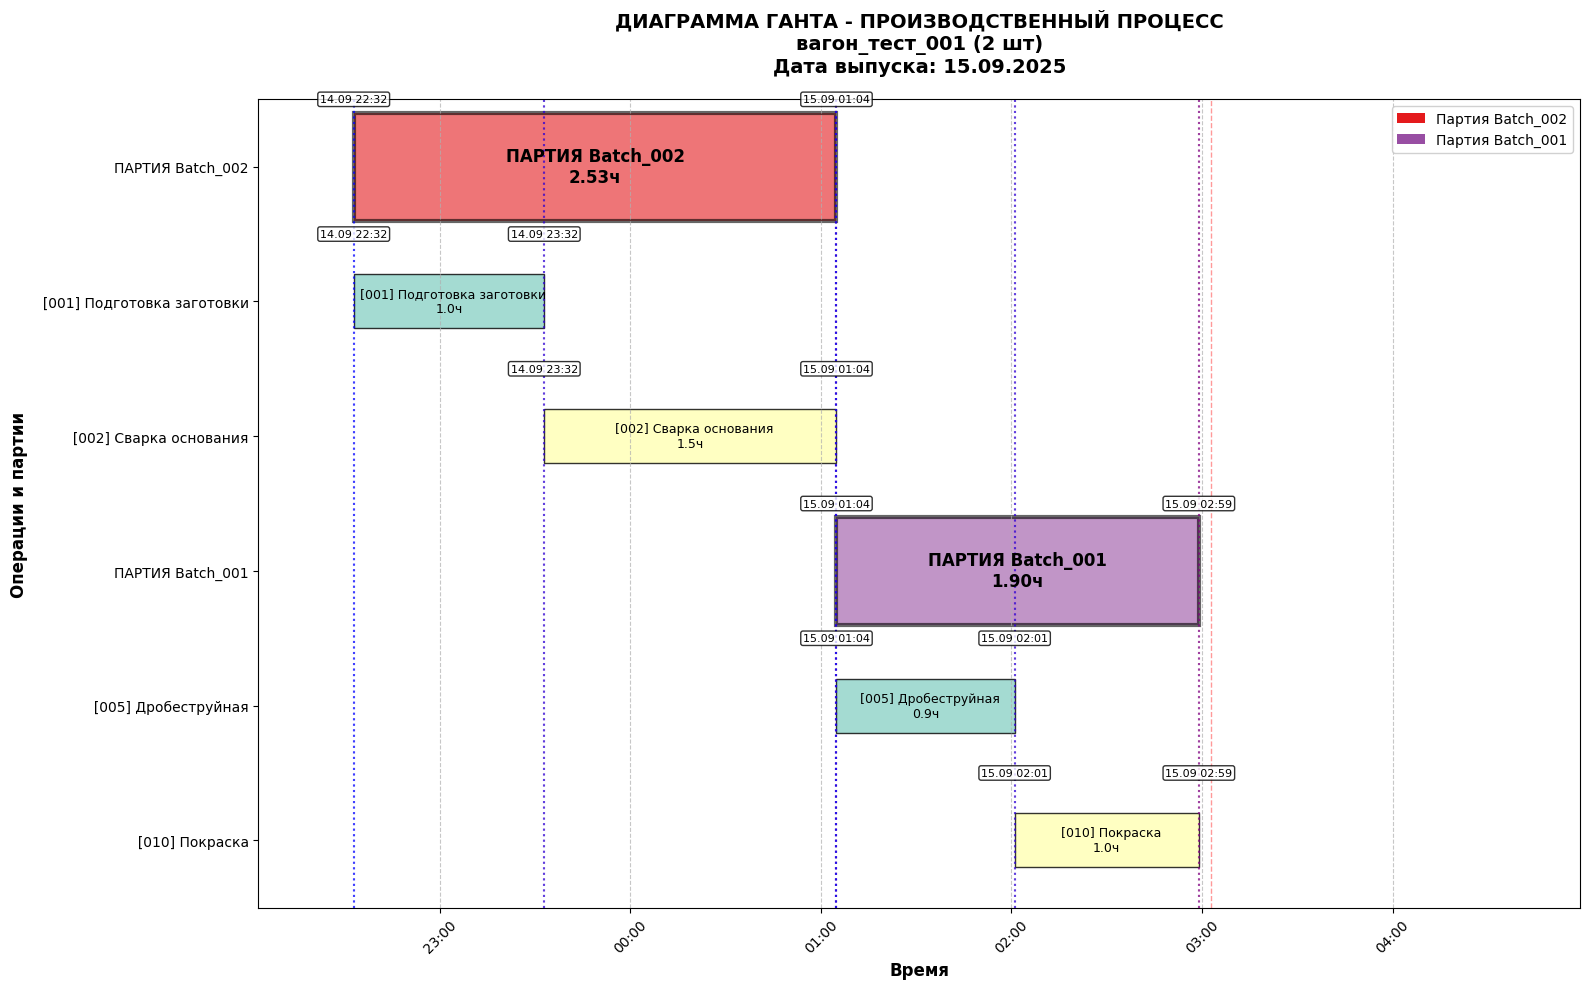

ИТОГОВАЯ ИНФОРМАЦИЯ:
НАЧАЛО ПРОИЗВОДСТВА: 14.09.2025 22:32
ОКОНЧАНИЕ ПРОИЗВОДСТВА: 15.09.2025 02:59
ОБЩАЯ ДЛИТЕЛЬНОСТЬ ПРОЦЕССА: 4.43 часов (с учетом нерабочего времени)
СУММАРНАЯ РАБОЧАЯ ДЛИТЕЛЬНОСТЬ ПАРТИЙ: 4.43 рабочих часов
ДАТА ВЫПУСКА ИЗДЕЛИЯ: 15.09.2025
✓ СРОК ВЫПУСКА СОБЛЮДЕН (последняя операция закончится до 03:00)

ПОЯСНЕНИЯ К ДИАГРАММЕ:
• Горизонтальная ось: Время с учетом рабочего расписания цеха
• Вертикальная ось: Партии и операции (партии выделены крупными прямоугольниками)
• Крупные прямоугольники: Партии (группы операций)
• Мелкие прямоугольники: Отдельные операции внутри партий
• Синие пунктирные линии: Моменты начала операций
• Фиолетовые пунктирные линии: Моменты окончания операций
• Зеленые пунктирные линии: Начало дневной смены (7:00)
• Оранжевые пунктирные линии: Начало вечерней смены (19:00)
• Красные пунктирные линии: Начало нерабочего периода (3:00)
• Белые зоны между красными и зелеными линиями: Нерабочее время цеха
• Сетка: Помогает визуально определить врем

In [57]:
# ЯЧЕЙКА 6: ПОСТРОЕНИЕ ДИАГРАММЫ ГАНТА С ГРУППИРОВКОЙ ПО ПАРТИЯМ И ПОЛНЫМ КОЛИЧЕСТВОМ ЛИНИЙ
print("="*80)
print("ЯЧЕЙКА 6: ПОСТРОЕНИЕ ДИАГРАММЫ ГАНТА С ПОЛНЫМ КОЛИЧЕСТВОМ ЛИНИЙ")
print("="*80)

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np

# Функция для проверки рабочего времени с учетом настроек
def is_working_time(check_time, work_schedule):
    """Проверка, является ли время рабочим с учетом настроек цеха"""
    hour = check_time.hour
    night_end = work_schedule['Вторая смена (окончание)']
    day_start = work_schedule['Первая смена (начало)']
    non_work_start = work_schedule['Нерабочий период (начало)']
    non_work_end = work_schedule['Нерабочий период (окончание)']

    # Если время в рабочем периоде 1-й или 2-й смены
    if hour >= day_start or hour < night_end:
        # Но если попадает в нерабочий период
        if non_work_start < non_work_end:
            # Нерабочий период в пределах одного дня
            if hour >= non_work_start and hour < non_work_end:
                return False
        else:
            # Нерабочий период пересекает полночь
            if hour >= non_work_start or hour < non_work_end:
                return False
        return True
    return False

# Функция для добавления рабочего времени с учетом графика цеха
def add_working_time_proper(start_time, working_hours, work_schedule):
    """Добавление рабочих часов с учетом настроенного графика цеха"""
    current_time = start_time
    hours_added = 0.0

    while hours_added < working_hours:
        if not is_working_time(current_time, work_schedule):
            # Перемотать до начала рабочего времени
            next_day = current_time.date()
            start_hour = work_schedule['Первая смена (начало)']
            if current_time.hour >= work_schedule['Нерабочий период (начало)']:
                next_day += timedelta(days=1)
            current_time = datetime.combine(next_day, datetime.min.time()).replace(hour=start_hour)
            continue

        step = min(1.0, working_hours - hours_added)
        hours_added += step
        current_time += timedelta(hours=step)

        # Проверка на попадание в нерабочее время
        if not is_working_time(current_time, work_schedule):
            # Переводим на начало следующей смены
            next_day = current_time.date()
            start_hour = work_schedule['Первая смена (начало)']
            if current_time.hour >= work_schedule['Нерабочий период (начало)']:
                next_day += timedelta(days=1)
            current_time = datetime.combine(next_day, datetime.min.time()).replace(hour=start_hour)

    return current_time

# Функция для вычитания рабочего времени (планирование от конца к началу)
def subtract_working_time(end_time, working_hours, work_schedule):
    """Вычитание рабочих часов с учетом графика (планирование от конца к началу)"""
    current_time = end_time
    hours_subtracted = 0.0

    while hours_subtracted < working_hours:
        if not is_working_time(current_time, work_schedule):
            # Найти начало следующего рабочего периода
            current_hour = current_time.hour

            # Если мы в нерабочем периоде, перемещаемся к началу следующей смены
            if current_hour >= work_schedule['Нерабочий период (начало)'] or current_hour < work_schedule['Нерабочий период (окончание)']:
                if current_hour >= work_schedule['Нерабочий период (начало)']:
                    # Перемещаемся к началу первой смены следующего дня
                    next_day = current_time.date() + timedelta(days=1)
                    current_time = datetime.combine(next_day, datetime.min.time()).replace(
                        hour=work_schedule['Первая смена (начало)'], minute=0, second=0)
                else:
                    # Перемещаемся к началу первой смены текущего дня
                    current_time = current_time.replace(hour=work_schedule['Первая смена (начало)'], minute=0, second=0)
                continue

        step = min(1.0, working_hours - hours_subtracted)
        hours_subtracted += step

        # Вычитаем время
        current_time -= timedelta(hours=step)

        # Проверяем, не попали ли в нерабочее время
        if not is_working_time(current_time, work_schedule):
            # Найти конец предыдущего рабочего периода
            current_hour = current_time.hour
            if current_hour >= work_schedule['Нерабочий период (начало)']:
                current_time = current_time.replace(hour=work_schedule['Нерабочий период (начало)']-1, minute=59, second=0)
            elif current_hour < work_schedule['Нерабочий период (окончание)']:
                prev_day = current_time.date() - timedelta(days=1)
                current_time = datetime.combine(prev_day, datetime.min.time()).replace(
                    hour=work_schedule['Вторая смена (окончание)']-1, minute=59, second=0)

    return current_time

def create_gantt_data_with_batch_grouping(operations, start_time, work_schedule):
    """Создание данных для диаграммы Ганта с группировкой по партиям"""
    gantt_bars = []

    # Группируем операции по партиям
    batch_groups = {}
    for op in operations:
        batch_id = op.get('Batch_ID', 'Unknown')
        if batch_id not in batch_groups:
            batch_groups[batch_id] = []
        batch_groups[batch_id].append(op)

    current_time = start_time

    print("РАСЧЕТ ВРЕМЕННЫХ ПАРАМЕТРОВ ПАРТИЙ:")
    print("-"*70)

    # Обрабатываем каждую партию
    for batch_id, batch_operations in batch_groups.items():
        print(f"\nПартия {batch_id}:")

        # Рассчитываем общую длительность партии
        batch_duration_hours = 0
        for i, op in enumerate(batch_operations):
            N = op['Количество'] if op['Тип времени'] == 'НаДеталь' else 1
            T_sht = op['Тшт (мин)']
            T_pz = op['Тпз (мин)']
            TimeService = op['Время обслуживания (мин)']
            k_sr = calculate_k_sr_no_print(op['Исполнители'], op['Дата операции'])

            correctable_part = (T_sht + T_pz) * N
            non_correctable_part = TimeService * N
            duration_with_k = correctable_part / k_sr + non_correctable_part
            duration_hours = duration_with_k / 60

            batch_duration_hours += duration_hours
            print(f"  Операция {i+1}: {duration_hours:.2f} часов")

        print(f"  Общая длительность партии {batch_id}: {batch_duration_hours:.2f} часов")

        # Создаем бар для партии
        start_batch = current_time
        end_batch = add_working_time_proper(current_time, batch_duration_hours, work_schedule)

        gantt_bars.append({
            'Операция': f'ПАРТИЯ {batch_id}',
            'Начало': start_batch,
            'Окончание': end_batch,
            'Длительность (часы)': round(batch_duration_hours, 2),
            'Тип': 'Batch',
            'Batch_ID': batch_id,
            'Цвет': plt.cm.Set1(len(gantt_bars) % 10)  # Разные цвета для партий
        })

        # Добавляем отдельные операции внутри партии
        batch_time = start_batch
        for i, op in enumerate(batch_operations):
            N = op['Количество'] if op['Тип времени'] == 'НаДеталь' else 1
            T_sht = op['Тшт (мин)']
            T_pz = op['Тпз (мин)']
            TimeService = op['Время обслуживания (мин)']
            k_sr = calculate_k_sr_no_print(op['Исполнители'], op['Дата операции'])

            correctable_part = (T_sht + T_pz) * N
            non_correctable_part = TimeService * N
            duration_with_k = correctable_part / k_sr + non_correctable_part
            duration_hours = duration_with_k / 60

            start_op = batch_time
            end_op = add_working_time_proper(batch_time, duration_hours, work_schedule)

            gantt_bars.append({
                'Операция': f"  {op['Операция']}",
                'Начало': start_op,
                'Окончание': end_op,
                'Длительность (часы)': round(duration_hours, 2),
                'Тип': 'Operation',
                'Batch_ID': batch_id,
                'Цвет': plt.cm.Set3(i % 12)  # Разные цвета для операций
            })

            batch_time = end_op

        current_time = end_batch

    return gantt_bars

# === ОПРЕДЕЛЕНИЕ ВРЕМЕНИ ПРОИЗВОДСТВА ===
print("ОПРЕДЕЛЕНИЕ ВРЕМЕНИ ПРОИЗВОДСТВА:")
print("-"*50)

try:
    release_date_str = PRODUCT_INFO['Дата выпуска']
    release_date = datetime.strptime(release_date_str, '%d.%m.%Y')
    print(f"Дата выпуска изделия: {release_date.strftime('%d.%m.%Y')}")

    # Определяем крайний срок - конец второй смены в день выпуска
    deadline_time = datetime(2025, 9, 15, 2, 59, 0)
    print(f"Крайний срок окончания производства: {deadline_time.strftime('%d.%m.%Y %H:%M')}")

    # Рассчитываем общую длительность для всех партий
    total_working_hours = 0
    batch_durations = {}

    # Группируем по партиям для расчета
    batch_groups = {}
    for op in TECHNOLOGICAL_SEQUENCE:
        batch_id = op.get('Batch_ID', 'Unknown')
        if batch_id not in batch_groups:
            batch_groups[batch_id] = []
        batch_groups[batch_id].append(op)

    print(f"\nРасчет длительности партий:")
    for batch_id, batch_operations in batch_groups.items():
        batch_duration = 0
        for op in batch_operations:
            N = op['Количество'] if op['Тип времени'] == 'НаДеталь' else 1
            T_sht = op['Тшт (мин)']
            T_pz = op['Тпз (мин)']
            TimeService = op['Время обслуживания (мин)']
            k_sr = calculate_k_sr_no_print(op['Исполнители'], op['Дата операции'])

            correctable_part = (T_sht + T_pz) * N
            non_correctable_part = TimeService * N
            duration_with_k = correctable_part / k_sr + non_correctable_part
            duration_hours = duration_with_k / 60

            batch_duration += duration_hours

        batch_durations[batch_id] = batch_duration
        print(f"  Партия {batch_id}: {batch_duration:.2f} часов")
        total_working_hours += batch_duration

    print(f"Общая рабочая длительность: {total_working_hours:.2f} часов")

    # Планируем от даты выпуска назад!
    START_TIME = subtract_working_time(deadline_time, total_working_hours, WORK_SCHEDULE)
    print(f"Начало производства (спланировано от даты выпуска): {START_TIME.strftime('%d.%m.%Y %H:%M')}")

except Exception as e:
    print(f"Ошибка при определении даты: {e}")
    START_TIME = datetime(2025, 9, 14, WORK_SCHEDULE['Первая смена (начало)'], 0, 0)

# Создание данных для диаграммы с группировкой по партиям
gantt_data = create_gantt_data_with_batch_grouping(TECHNOLOGICAL_SEQUENCE, START_TIME, WORK_SCHEDULE)

# Определяем временные границы для диаграммы
if gantt_data:
    min_time = min([bar['Начало'] for bar in gantt_data])
    max_time = max([bar['Окончание'] for bar in gantt_data])
    START_TIME_DISPLAY = min_time - timedelta(minutes=30)
    END_TIME_DISPLAY = max_time + timedelta(hours=2)
else:
    START_TIME_DISPLAY = START_TIME
    END_TIME_DISPLAY = START_TIME + timedelta(hours=8)

print(f"\nПАРАМЕТРЫ ДИАГРАММЫ ГАНТА:")
print(f"  Время отображения: {START_TIME_DISPLAY.strftime('%d.%m.%Y %H:%M')} - {END_TIME_DISPLAY.strftime('%d.%m.%Y %H:%M')}")
print(f"  Общая длительность процесса: {(END_TIME_DISPLAY - START_TIME_DISPLAY).total_seconds() / 3600:.2f} часов")

# Создание диаграммы Ганта с группировкой
fig, ax = plt.subplots(figsize=(16, 10))

# Построение диаграммы
y_positions = []
batch_labels = {}  # Для отслеживания позиций партий

for i, bar in enumerate(gantt_data):
    # Координаты прямоугольника
    start_num = mdates.date2num(bar['Начало'])
    end_num = mdates.date2num(bar['Окончание'])
    width = end_num - start_num
    y_pos = len(gantt_data) - i - 1
    y_positions.append(y_pos)

    if bar['Тип'] == 'Batch':
        # Создание прямоугольника для партии (более крупный)
        rect = Rectangle(
            (start_num, y_pos - 0.4),
            width,
            0.8,
            facecolor=bar['Цвет'],
            edgecolor='black',
            linewidth=3,
            alpha=0.6
        )
        batch_labels[bar['Batch_ID']] = y_pos
    else:
        # Создание прямоугольника для операции (меньший)
        rect = Rectangle(
            (start_num, y_pos - 0.2),
            width,
            0.4,
            facecolor=bar['Цвет'],
            edgecolor='black',
            linewidth=1,
            alpha=0.8
        )

    ax.add_patch(rect)

    # Добавление подписей
    if bar['Тип'] == 'Batch':
        # Подпись для партии
        ax.text(
            start_num + width/2,
            y_pos,
            f"{bar['Операция']}\n{bar['Длительность (часы)']:.2f}ч",
            ha='center',
            va='center',
            fontweight='bold',
            fontsize=12
        )
    else:
        # Подпись для операции
        ax.text(
            start_num + width/2,
            y_pos,
            f"{bar['Операция']}\n{bar['Длительность (часы)']:.1f}ч",
            ha='center',
            va='center',
            fontweight='normal',
            fontsize=9
        )

    # Дата начала слева
    ax.text(
        start_num,
        y_pos + 0.5,
        bar['Начало'].strftime('%d.%m %H:%M'),
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8)
    )

    # Дата окончания справа
    ax.text(
        end_num,
        y_pos + 0.5,
        bar['Окончание'].strftime('%d.%m %H:%M'),
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8)
    )

# Настройка осей
ax.set_xlim(mdates.date2num(START_TIME_DISPLAY), mdates.date2num(END_TIME_DISPLAY))
ax.set_ylim(-0.5, len(gantt_data) - 0.5)
ax.set_yticks(y_positions)
ax.set_yticklabels([bar['Операция'] for bar in gantt_data])

# Форматирование временной оси
time_diff_hours = (END_TIME_DISPLAY - START_TIME_DISPLAY).total_seconds() / 3600
if time_diff_hours <= 4:
    interval = 30  # 30 минут
    date_format = '%H:%M'
elif time_diff_hours <= 12:
    interval = 1  # 1 час
    date_format = '%H:%M'
else:
    interval = 2  # 2 часа
    date_format = '%d.%m %H:%M'

ax.xaxis.set_major_formatter(mdates.DateFormatter(date_format))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=interval))

# Поворот меток для лучшей читаемости
if time_diff_hours > 6:
    plt.xticks(rotation=45)
else:
    plt.xticks(rotation=0)

# Добавляем ВСЕ вертикальные линии как в предыдущей версии
print("Добавление вертикальных линий:")
for bar in gantt_data:
    start_line = mdates.date2num(bar['Начало'])
    end_line = mdates.date2num(bar['Окончание'])
    ax.axvline(x=start_line, color='blue', linestyle=':', alpha=0.5)
    ax.axvline(x=end_line, color='purple', linestyle=':', alpha=0.5)
    print(f"  Линии для {bar['Операция']}: начало {bar['Начало'].strftime('%d.%m.%Y %H:%M')}, окончание {bar['Окончание'].strftime('%d.%m.%Y %H:%M')}")

# ДОПОЛНИТЕЛЬНЫЕ линии для обозначения смен на ВСЕМ ПРОМЕЖУТКЕ диаграммы
print("Добавление линий смен:")
current_line_time = START_TIME_DISPLAY
while current_line_time <= END_TIME_DISPLAY:
    hour = current_line_time.hour
    # Линии для начала смен
    if hour == WORK_SCHEDULE['Первая смена (начало)']:  # Начало дневной смены
        ax.axvline(x=mdates.date2num(current_line_time), color='green', linestyle='--', alpha=0.4, linewidth=1)
        print(f"  Зеленая линия смены: {current_line_time.strftime('%d.%m.%Y %H:%M')}")
    elif hour == WORK_SCHEDULE['Вторая смена (начало)']:  # Начало вечерней смены
        ax.axvline(x=mdates.date2num(current_line_time), color='orange', linestyle='--', alpha=0.4, linewidth=1)
        print(f"  Оранжевая линия смены: {current_line_time.strftime('%d.%m.%Y %H:%M')}")
    elif hour == WORK_SCHEDULE['Нерабочий период (начало)']:  # Начало нерабочего периода
        ax.axvline(x=mdates.date2num(current_line_time), color='red', linestyle='--', alpha=0.4, linewidth=1)
        print(f"  Красная линия нерабочего времени: {current_line_time.strftime('%d.%m.%Y %H:%M')}")
    current_line_time += timedelta(hours=1)

# Сетка и оформление
plt.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_xlabel('Время', fontsize=12, fontweight='bold')
ax.set_ylabel('Операции и партии', fontsize=12, fontweight='bold')

# Формируем заголовок
title_text = f'ДИАГРАММА ГАНТА - ПРОИЗВОДСТВЕННЫЙ ПРОЦЕСС\n{PRODUCT_INFO["Изделие"]} ({PRODUCT_INFO["Количество в партии"]} шт)'
if 'Дата выпуска' in PRODUCT_INFO:
    title_text += f'\nДата выпуска: {PRODUCT_INFO["Дата выпуска"]}'

ax.set_title(title_text, fontsize=14, fontweight='bold', pad=20)

# Легенда партий
batch_legend_elements = []
for batch_id in batch_labels.keys():
    # Находим первую операцию этой партии для цвета
    for bar in gantt_data:
        if bar.get('Batch_ID') == batch_id and bar['Тип'] == 'Batch':
            batch_legend_elements.append(
                plt.Rectangle((0,0),1,1, facecolor=bar['Цвет'],
                             label=f'Партия {batch_id}')
            )
            break

if batch_legend_elements:
    ax.legend(handles=batch_legend_elements, loc='upper right', framealpha=0.9)

plt.tight_layout()
plt.show()

# Расчет и вывод общей информации
if gantt_data:
    total_duration = (gantt_data[-1]['Окончание'] - gantt_data[0]['Начало']).total_seconds() / 3600
    working_duration = sum([bar['Длительность (часы)'] for bar in gantt_data if bar['Тип'] == 'Batch'])

    print("="*80)
    print("ИТОГОВАЯ ИНФОРМАЦИЯ:")
    print("="*80)
    print(f"НАЧАЛО ПРОИЗВОДСТВА: {gantt_data[0]['Начало'].strftime('%d.%m.%Y %H:%M')}")
    print(f"ОКОНЧАНИЕ ПРОИЗВОДСТВА: {gantt_data[-1]['Окончание'].strftime('%d.%m.%Y %H:%M')}")
    print(f"ОБЩАЯ ДЛИТЕЛЬНОСТЬ ПРОЦЕССА: {total_duration:.2f} часов (с учетом нерабочего времени)")
    print(f"СУММАРНАЯ РАБОЧАЯ ДЛИТЕЛЬНОСТЬ ПАРТИЙ: {working_duration:.2f} рабочих часов")
    print(f"ДАТА ВЫПУСКА ИЗДЕЛИЯ: {PRODUCT_INFO.get('Дата выпуска', 'не указана')}")

    # Проверка соответствия дате выпуска
    try:
        release_date = datetime.strptime(PRODUCT_INFO['Дата выпуска'], '%d.%m.%Y')
        required_end = datetime(2025, 9, 15, 2, 59, 0)

        actual_end = gantt_data[-1]['Окончание']
        if actual_end <= required_end:
            print("✓ СРОК ВЫПУСКА СОБЛЮДЕН (последняя операция закончится до 03:00)")
        else:
            print(f"✗ СРОК ВЫПУСКА НАРУШЕН (операция закончится {actual_end.strftime('%d.%m.%Y %H:%M')})")
    except Exception as e:
        print(f"⚠ Невозможно проверить срок выпуска: {e}")

print("\n" + "="*80)
print("ПОЯСНЕНИЯ К ДИАГРАММЕ:")
print("="*80)
print("• Горизонтальная ось: Время с учетом рабочего расписания цеха")
print("• Вертикальная ось: Партии и операции (партии выделены крупными прямоугольниками)")
print("• Крупные прямоугольники: Партии (группы операций)")
print("• Мелкие прямоугольники: Отдельные операции внутри партий")
print("• Синие пунктирные линии: Моменты начала операций")
print("• Фиолетовые пунктирные линии: Моменты окончания операций")
print(f"• Зеленые пунктирные линии: Начало дневной смены ({WORK_SCHEDULE['Первая смена (начало)']}:00)")
print(f"• Оранжевые пунктирные линии: Начало вечерней смены ({WORK_SCHEDULE['Вторая смена (начало)']}:00)")
print(f"• Красные пунктирные линии: Начало нерабочего периода ({WORK_SCHEDULE['Нерабочий период (начало)']}:00)")
print(f"• Белые зоны между красными и зелеными линиями: Нерабочее время цеха")
print("• Сетка: Помогает визуально определить временные интервалы")